In [1]:
from sympy import *

n = symbols('n')
y = 1250*(2-exp(-(n-5000)**2))

func1 = diff(y,n) # 求导数
func1

-1250*(-2*n + 10000)*exp(-(n - 5000)**2)

In [2]:
stag = solve(diff(y,n),n)
print("该函数驻点为",stag) # 计算驻点

该函数驻点为 [5000]


In [3]:
# 计算二阶导数
func2 = diff(y, n, 2) # 求导数
func2

2500*(-2*(n - 5000)**2 + 1)*exp(-(n - 5000)**2)

In [ ]:
# 计算驻点的二阶导数值，验证正负
print(func2.evalf(subs = {n:5000}))
func2.evalf(subs = {n:5000}) > 0

In [4]:
# 函数的极小值
y.evalf(subs = {n:5000})

1250.00000000000

### 使用scipy求解多元函数的极值

In [5]:
import scipy.optimize as opt
from scipy import fmin
import numpy as np

In [6]:
def func0(cost, x, a):
    return cost*x*(2 - exp(-(x - a)**2))
func = lambda x: (2000*x[0] + 3000*x[1] + 4500*x[2]) / (func0(750, x[0], 6000) + func0(1250, x[1], 5000) + func0(2000, x[2], 3000)) - 1 
bnds = ((1, 10000), (1, 10000), (1, 10000))
res = opt.minimize(fun=func, x0=np.array([2, 1, 1]), bounds=bnds)
res

      fun: 0.126003183161215
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.23989749e-04,  3.71169762e-04, -8.03801470e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 64
      nit: 15
   status: 0
  success: True
        x: array([  1.        ,   1.        , 123.60336739])

In [7]:
from scipy import integrate # 已知函数表达式积分
from scipy import pi
def f(h):
    '''
    定义函数表达式.
    '''
    return 88.2 * pi * (5 - h)
v, err = integrate.quad(f, 0, 5) # 被积函数与积分区间
v

3463.605900582747

In [8]:
# 第一型曲线积分
from scipy import sinh, cosh, sqrt
def f(x):
    index1 = (2 - 3 * cosh(x/300) - 0.1 * ((x/50)**2))
    return (1 + 1.5 ** index1) * sqrt(100 + (sinh(x/300))**2)

v, err = integrate.quad(f, -300, 300)
v * 11.79

98635.09908278256

## 实战项目——人口增长问题

参考[【Python学习】基于pytorch和pysimplegui实现中国人口预测算法部署
](https://blog.csdn.net/m0_37201243/article/details/103368772)

In [1]:
!pip install pysimplegui

You are using pip version 9.0.1, however version 22.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
# 导入相应包
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  from ipykernel import kernelapp as app


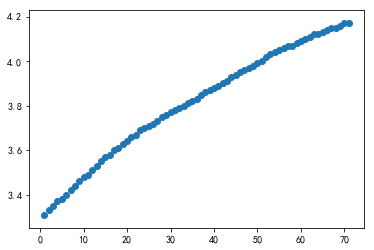

In [16]:
# 获取数据
year = torch.unsqueeze(torch.range(start=1950, end=2020, step=1, out=None), dim=1) 
year = year - 1949  # year-1949
cp = torch.unsqueeze(torch.tensor([3.31 ,3.33 ,3.35 ,3.37 ,3.38 ,3.40 ,3.42 ,3.44 ,3.46 ,3.48 ,3.49 ,3.51 ,
                                   3.53 ,3.55 ,3.57 ,3.58 ,3.60 ,3.61 ,3.63 ,3.64 ,3.66 ,3.67 ,3.69 ,3.70 ,
                                   3.71 ,3.72 ,3.73 ,3.75 ,3.76 ,3.77 ,3.78 ,3.79 ,3.80 ,3.81 ,3.82 ,3.83 ,
                                   3.85 ,3.86 ,3.87 ,3.88 ,3.89 ,3.90 ,3.91 ,3.93 ,3.94 ,3.95 ,3.96 ,3.97 ,
                                   3.98 ,3.99 ,4.00 ,4.02 ,4.03 ,4.04 ,4.05 ,4.06 ,4.07 ,4.07 ,4.08 ,4.09 ,4.10 ,
                                   4.11 ,4.12 ,4.12 ,4.13 ,4.14 ,4.15 ,4.15 ,4.16 ,4.17 ,4.17 ]), dim=1)   # 单位：千
plt.scatter(year.data.numpy(), cp.data.numpy())
plt.show()


In [17]:
torch.manual_seed(1)    # reproducible
from cpa import PAnet

In [18]:
def train(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS):
    '''
    EPOCH          训练次数
    LR             学习率
    HIDDEN_SIZE    隐藏层网络宽度
    HIDDEN_LAYERS  隐藏层深度
    
    '''
    time = np.arange(EPOCH)   # 产生自变量
    loss_list = []
    cn_panet = PAnet(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1, hidden_num=HIDDEN_LAYERS-1)     # define the network
    print(cn_panet)  # net architecture
    optimizer = torch.optim.SGD(cn_panet.parameters(), lr=LR)  # 调小学习率
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
    for t in range(EPOCH):
        prediction = cn_panet(year)          # input x and predict based on x
        loss = loss_func(prediction, cp)     # must be (1. nn output, 2. target)
        loss_list.append(loss)

        optimizer.zero_grad()                # clear gradients for next train
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients    
    return time, loss_list

In [19]:
# Hyper Parameters
EPOCH = 5000 # 训练次数
LR = 0.002 # 学习率
HIDDEN_SIZE = 30 # 隐藏层网络宽度
HIDDEN_LAYERS = 5 # 隐藏层深度
time, loss_list_02 = train(EPOCH, 0.2, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0005 = train(EPOCH, 0.005, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0002 = train(EPOCH, 0.002, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0003 = train(EPOCH, 0.003, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0004 = train(EPOCH, 0.004, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0001 = train(EPOCH, 0.001, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_00002 = train(EPOCH, 0.0002, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_000002 = train(EPOCH, 0.00002, HIDDEN_SIZE, HIDDEN_LAYERS)

PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): Linear(in_features=30, out_f

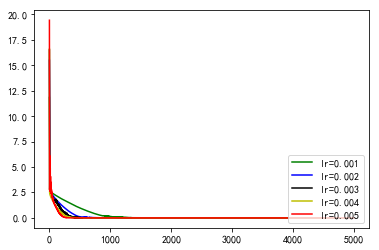

In [20]:
plt.plot(time, loss_list_0001, 'g-', label='lr=0.001') 
plt.plot(time, loss_list_0002, 'b-', label='lr=0.002') 
plt.plot(time, loss_list_0003, 'k-', label='lr=0.003') 
plt.plot(time, loss_list_0004, 'y-', label='lr=0.004') 
plt.plot(time, loss_list_0005, 'r-', label='lr=0.005') 

plt.legend(loc='lower right')  # 说明图例  # loc='lower right' 设置图例放置位置

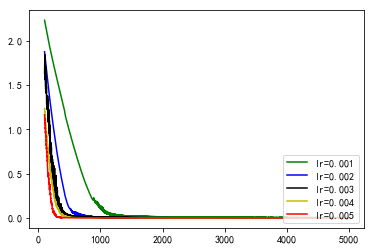

In [21]:
plt.plot(time[100:], loss_list_0001[100:], 'g-', label='lr=0.001') 
plt.plot(time[100:], loss_list_0002[100:], 'b-', label='lr=0.002') 
plt.plot(time[100:], loss_list_0003[100:], 'k-', label='lr=0.003') 
plt.plot(time[100:], loss_list_0004[100:], 'y-', label='lr=0.004') 
plt.plot(time[100:], loss_list_0005[100:], 'r-', label='lr=0.005') 
plt.legend(loc='lower right')  # 说明图例  # loc='lower right' 设置图例放置位置

In [22]:
# 导入相应包
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from cpa import PAnet
%matplotlib inline

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  from ipykernel import kernelapp as app


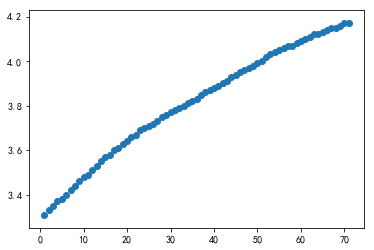

In [24]:
# 获取数据
year = torch.unsqueeze(torch.range(start=1950, end=2020, step=1, out=None), dim=1) 
year = year - 1949  # year-1958，假设1959年为第1年
cp = torch.unsqueeze(torch.tensor([3.31 ,3.33 ,3.35 ,3.37 ,3.38 ,3.40 ,3.42 ,3.44 ,3.46 ,3.48 ,3.49 ,3.51 ,
                                   3.53 ,3.55 ,3.57 ,3.58 ,3.60 ,3.61 ,3.63 ,3.64 ,3.66 ,3.67 ,3.69 ,3.70 ,
                                   3.71 ,3.72 ,3.73 ,3.75 ,3.76 ,3.77 ,3.78 ,3.79 ,3.80 ,3.81 ,3.82 ,3.83 ,
                                   3.85 ,3.86 ,3.87 ,3.88 ,3.89 ,3.90 ,3.91 ,3.93 ,3.94 ,3.95 ,3.96 ,3.97 ,
                                   3.98 ,3.99 ,4.00 ,4.02 ,4.03 ,4.04 ,4.05 ,4.06 ,4.07 ,4.07 ,4.08 ,4.09 ,4.10 ,
                                   4.11 ,4.12 ,4.12 ,4.13 ,4.14 ,4.15 ,4.15 ,4.16 ,4.17 ,4.17 ]), dim=1)   # 单位：千
plt.scatter(year.data.numpy(), cp.data.numpy())
plt.show()

In [25]:
# 训练并且保存网络函数
def trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS):
    '''
    EPOCH          训练次数
    LR             学习率
    HIDDEN_SIZE    隐藏层网络宽度
    HIDDEN_LAYERS  隐藏层深度
    
    '''
    time = np.arange(EPOCH)   # 产生自变量
    loss_list = []
    cn_panet = PAnet(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1, hidden_num=HIDDEN_LAYERS-1)     # define the network
    print(cn_panet)  # net architecture
    optimizer = torch.optim.SGD(cn_panet.parameters(), lr=LR)  # 调小学习率
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
    for t in range(EPOCH):
        prediction = cn_panet(year)          # input x and predict based on x
        loss = loss_func(prediction, cp)     # must be (1. nn output, 2. target)
        loss_list.append(loss)

        optimizer.zero_grad()                # clear gradients for next train
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients    
    torch.save(cn_panet, 'cn_panet.pkl')  # save entire net
    print("成功保存网络")
    return time, loss_list


In [26]:
# 读取网络模型函数
def restore_net(netname):
    # restore entire net1 to net2
    net = torch.load(netname)
    return net


PAnet(
  (hidden1): Linear(in_features=1, out_features=32, bias=True)
  (hidden2): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=32, bias=True)
    (6): Linear(in_features=32, out_features=32, bias=True)
  )
  (predict): Linear(in_features=32, out_features=1, bias=True)
)
成功保存网络


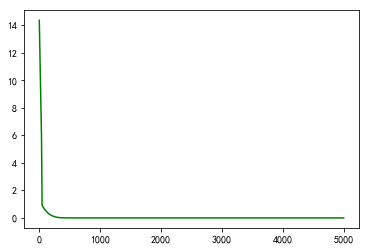

In [27]:
# 根据最优参数进行配置
EPOCH = 5000 # 训练次数
LR = 0.003 # 学习率
HIDDEN_SIZE = 32 # 隐藏层网络宽度
HIDDEN_LAYERS = 8 # 隐藏层深度
time, loss_list_02 = trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS)
plt.plot(time, loss_list_02, 'g-', label='损失函数曲线') 


In [29]:
reload_net = restore_net('cn_panet.pkl')
year_2030 = 2030 - 1950
year_2030 = torch.FloatTensor([[year_2030]])
print(year_2030.shape)
cp_2030 = reload_net(year_2030)
print("预测的230年人口为：",cp_2030.item(),"亿")


torch.Size([1, 1])
预测的230年人口为： 4.306649684906006 亿
